In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print([(f.name, f.fname) for f in fm.fontManager.ttflist if 'D2' in f.name])
plt.rcParams['font.family'] = 'D2Coding'

[('D2Coding', '/home/clim-lab/.local/share/fonts/D2CodingBold-Ver1.3.2-20180524.ttf'), ('D2Coding', '/home/clim-lab/.local/share/fonts/D2Coding-Ver1.3.2-20180524.ttf'), ('D2Coding ligature', '/home/clim-lab/.local/share/fonts/D2CodingBold-Ver1.3.2-20180524-ligature.ttf'), ('D2Coding ligature', '/home/clim-lab/.local/share/fonts/D2Coding-Ver1.3.2-20180524-ligature.ttf')]


In [3]:
# VAR
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [4]:
from utils.transformer_tf import *
import tensorflow as tf

2022-11-28 12:40:30.261864: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-28 12:40:30.466151: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-28 12:40:31.127903: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/clim-lab/miniconda3/envs/MEaI_transformer/lib/
2022-11-28 12:40:31.128006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; d

In [5]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-11-28 12:40:31.596665: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5476567264854409860
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11226120192
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1859984140071940743
 physical_device_desc: "device: 0, name: NVIDIA TITAN Xp, pci bus id: 0000:65:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

2022-11-28 12:40:32.267869: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /device:GPU:0 with 10706 MB memory:  -> device: 0, name: NVIDIA TITAN Xp, pci bus id: 0000:65:00.0, compute capability: 6.1


# 날씨 데이터

In [7]:
PM10 = pd.read_csv('./data/weather_and_pm10.csv')
PM10.일시 = pd.DatetimeIndex(PM10.일시,freq='H')

PM10.index = PM10.일시
PM10 = PM10.drop(columns = ['일시','풍향'])

PM10_col = PM10.columns.copy()
PM10_index = PM10.index.copy()

scaler_pm10 = StandardScaler()
scaler_pm10.fit(PM10)
PM10 = scaler_pm10.transform(PM10)

PM10 = pd.DataFrame(PM10,columns = PM10_col,index=PM10_index)

PM10

,기온,강수량,풍속,습도,기압,일조량,일사량,시정,관악pm10,서울pm10,수원pm10
일시,,,,,,,,,,,
2016-01-01 00:00:00,-1.380250,-0.116624,-1.756315,1.249828,1.953250,-0.668438,-0.662684,-1.672401,-0.238971,0.979317,0.720165
2016-01-01 01:00:00,-1.398323,-0.116624,-0.467261,1.149824,1.940958,-0.668438,-0.662684,-1.503463,0.118623,0.948170,0.747130
2016-01-01 02:00:00,-1.407360,-0.116624,-1.498504,1.299829,1.965542,-0.668438,-0.662684,-1.672401,0.404699,1.135054,1.097666
2016-01-01 03:00:00,-1.434469,-0.116624,-0.295387,1.499836,1.965542,-0.668438,-0.662684,-1.841339,0.565617,1.306364,1.353827
2016-01-01 04:00:00,-1.470615,-0.116624,-0.209450,1.499836,1.940958,-0.668438,-0.662684,-1.841339,0.726534,1.477674,1.609988
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,-1.786892,-0.116624,0.048361,-1.300263,1.830327,-0.668438,-0.662684,0.861675,0.082864,-0.609195,-0.412337
2021-12-31 20:00:00,-1.777855,-0.116624,1.681162,-1.250261,1.842619,-0.668438,-0.662684,0.861675,-0.203212,-0.453458,-0.250551
2021-12-31 21:00:00,-1.814001,-0.116624,2.282721,-1.200259,1.842619,-0.668438,-0.662684,0.861675,0.154383,-0.578047,-0.493230


## Vector autoregression

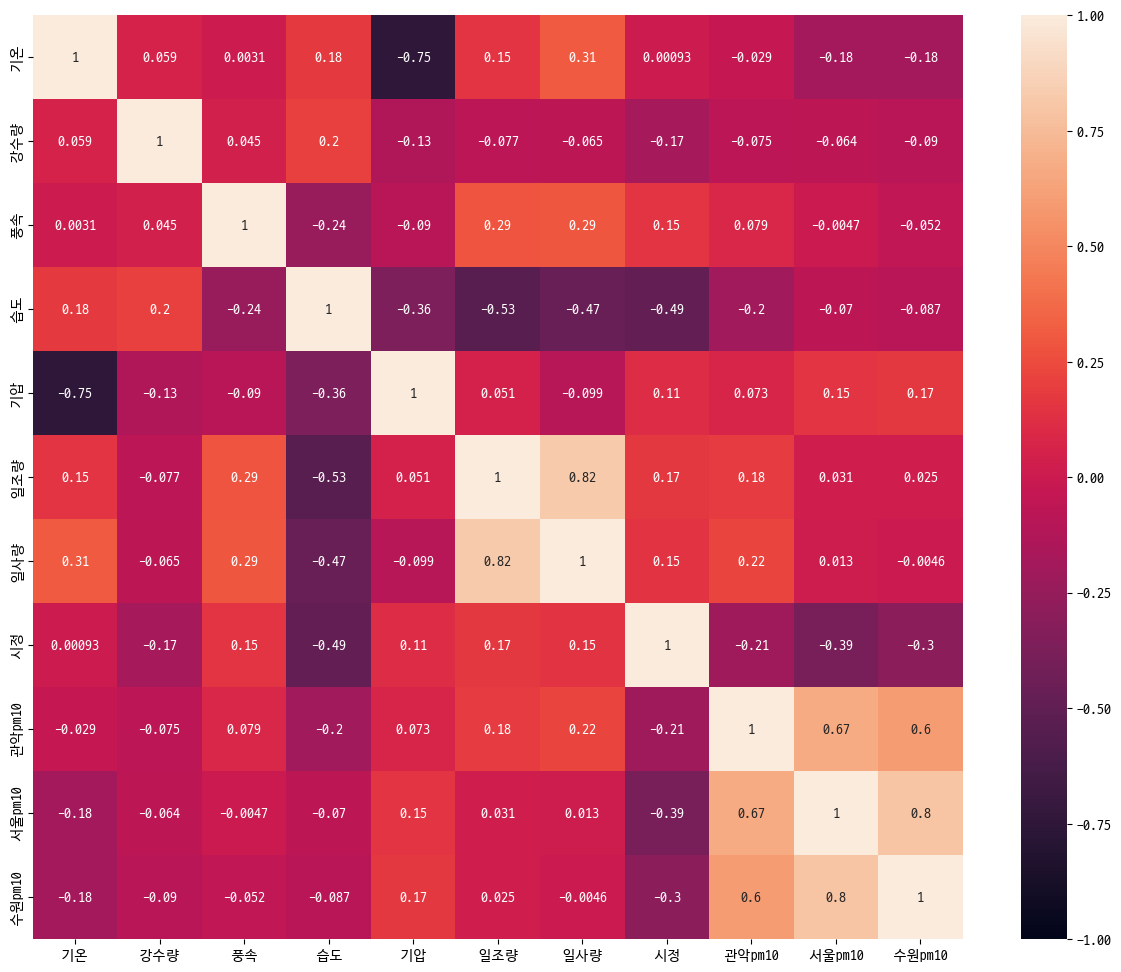

In [8]:
plt.figure(figsize=(15,12))

sns.heatmap(PM10.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

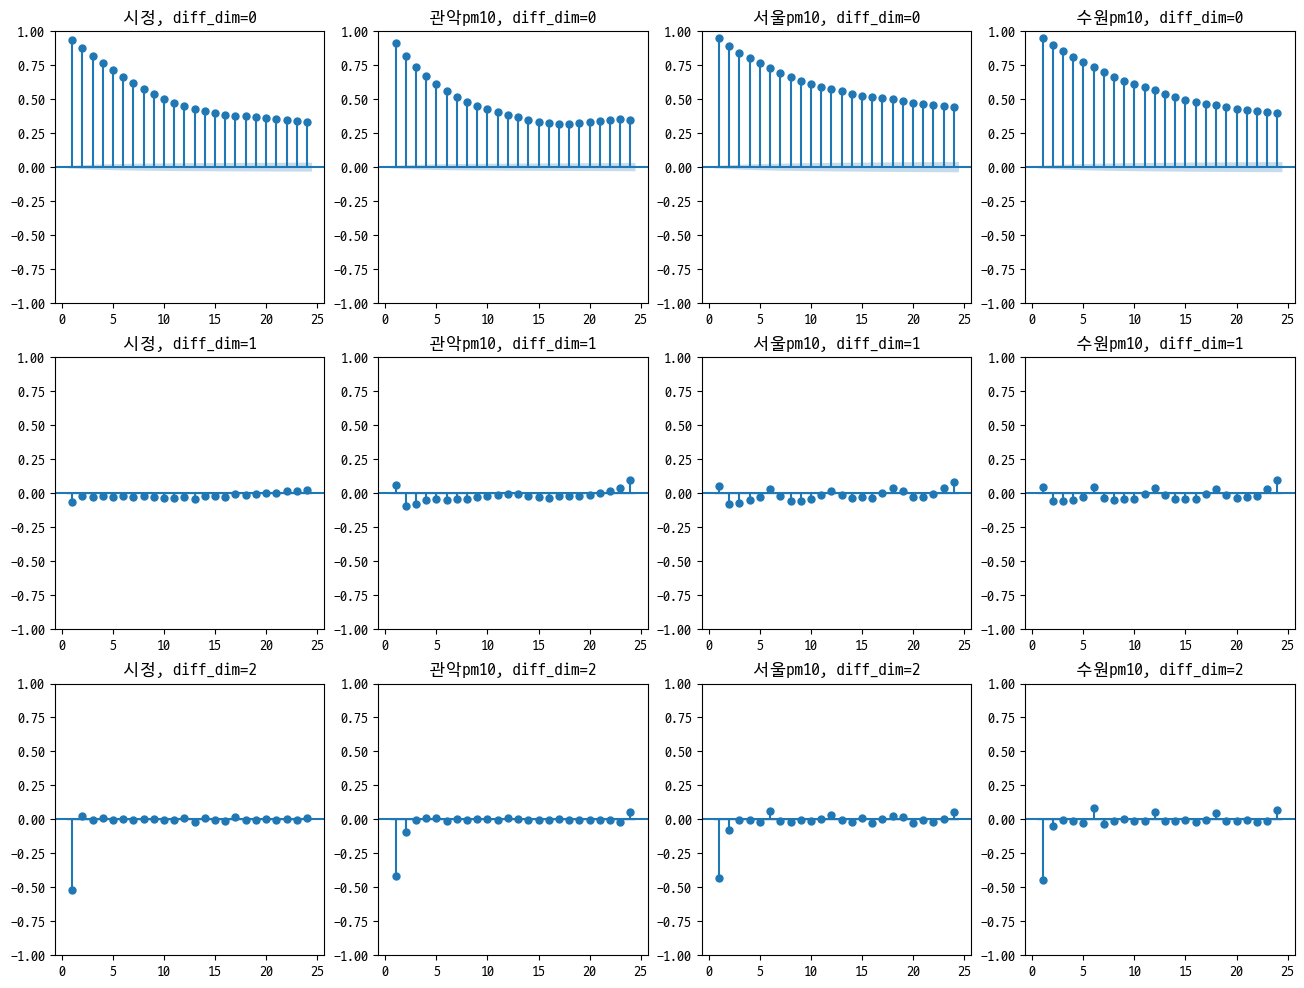

In [9]:
PM10_var = PM10[['시정','관악pm10','서울pm10','수원pm10']].copy()

max_diff = 3

fig = plt.figure(figsize=(16,4*max_diff))
ax_list = [fig.add_subplot(max_diff,4,i+1) for i in range(4*max_diff)]

for i in range(max_diff):
    for j,V in enumerate(['시정','관악pm10','서울pm10','수원pm10']):
        if i == 0:
            sm.graphics.tsa.plot_acf(PM10_var[V],lags=24,missing='drop',zero=False, ax=ax_list[4*i+j])
        elif i == 1:
            sm.graphics.tsa.plot_acf(PM10_var[V].diff().dropna(),lags=24,missing='drop',zero=False, ax=ax_list[4*i+j])
        else:
            sm.graphics.tsa.plot_acf(PM10_var[V].diff().diff().dropna(),lags=24,missing='drop',zero=False, ax=ax_list[4*i+j])
        ax_list[4*i+j].set_title(f'{V}, diff_dim={i}')

In [10]:
data_train = PM10_var[:'2021-12-30 23:00:00'].diff(periods=1).dropna()
data_test = PM10_var['2021-12-30 23:00:00':].diff(periods=1).dropna()
print(data_train.tail())
print('-'*20)
print(data_test.head())

                      시정    관악pm10    서울pm10    수원pm10
일시                                                    
2021-12-30 19:00:00  0.0  2.431643 -0.249178 -0.377501
2021-12-30 20:00:00  0.0  1.644935  0.062295 -0.161786
2021-12-30 21:00:00  0.0 -1.895251  0.249178  0.404465
2021-12-30 22:00:00  0.0  0.035759 -0.186884  0.134822
2021-12-30 23:00:00  0.0 -0.366534  0.062295 -0.107857
--------------------
                      시정    관악pm10    서울pm10    수원pm10
일시                                                    
2021-12-31 00:00:00  0.0 -0.366534 -0.155736 -0.026964
2021-12-31 01:00:00  0.0 -0.366534  0.000000  0.107857
2021-12-31 02:00:00  0.0 -0.366534 -0.186884  0.107857
2021-12-31 03:00:00  0.0  0.572151  0.186884 -0.026964
2021-12-31 04:00:00  0.0 -0.965505  0.093442 -0.134822


In [11]:
model = VAR(data_train)

#model.select_order(30)
#results = model.fit(maxlags=30, ic='aic')

results = model.fit(3)
results.summary()

/home/clim-lab/miniconda3/envs/MEaI_transformer/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 28, Nov, 2022
Time:                     12:40:42
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -8.61320
Nobs:                     52580.0    HQIC:                  -8.61923
Log likelihood:          -71707.6    FPE:                0.000180105
AIC:                     -8.62197    Det(Omega_mle):     0.000179927
--------------------------------------------------------------------
Results for equation 시정
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000055         0.001597            0.034           0.973
L1.시정            -0.065266         0.004396          -14.845           0.000
L1.관악pm10         0.006910         0.003933            1.757           0.079
L1

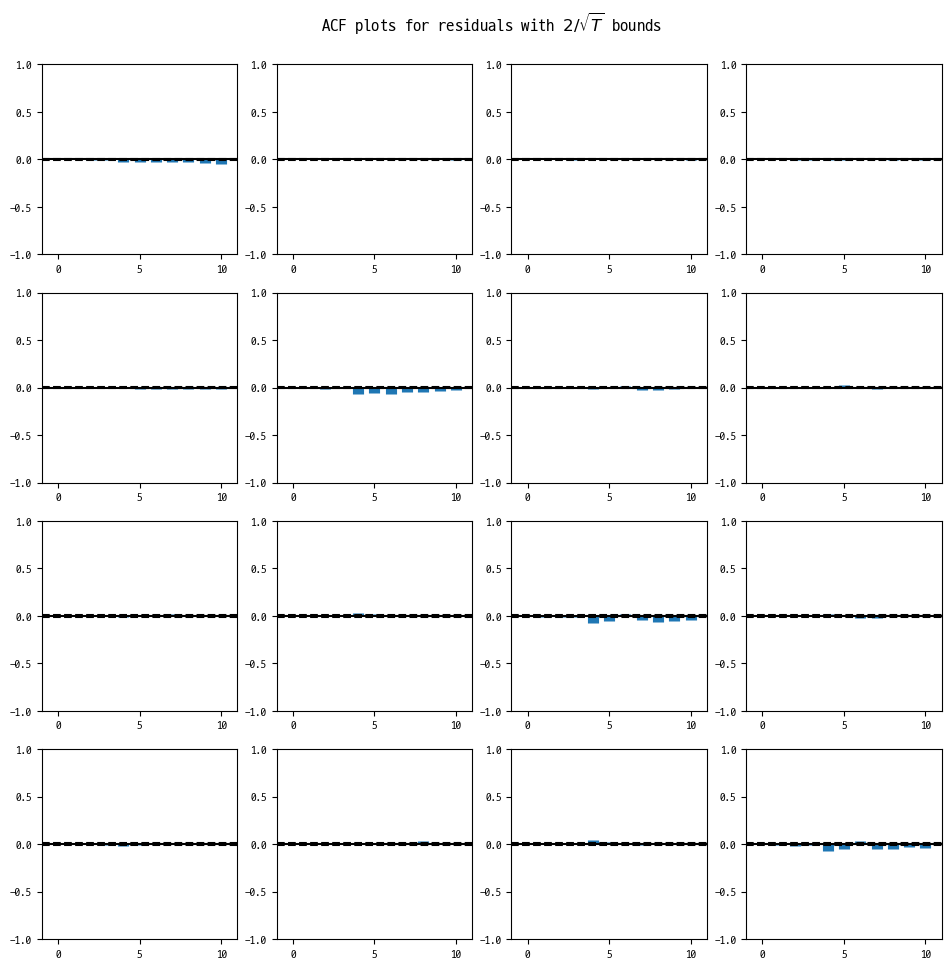

In [12]:
fig = results.plot_acorr()

In [13]:
PM10[['서울pm10']][-24:].reset_index(drop=True).to_numpy().reshape(-1)

array([-0.57804731, -0.57804731, -0.76493108, -0.57804731, -0.48460543,
       -0.60919461, -0.76493108, -0.57804731, -0.79607837, -0.79607837,
       -0.92066755, -0.88952025, -0.76493108, -0.6403419 , -0.70263649,
       -0.85837296, -0.54690002, -0.57804731, -0.54690002, -0.60919461,
       -0.45345814, -0.57804731, -0.48460543, -0.54690002])

In [14]:
data_test.to_numpy()

array([[ 0.        , -0.36653444, -0.15573647, -0.02696434],
       [ 0.        , -0.36653444,  0.        ,  0.10785735],
       [ 0.        , -0.36653444, -0.18688376,  0.10785735],
       [ 0.        ,  0.57215132,  0.18688376, -0.02696434],
       [ 0.        , -0.96550535,  0.09344188, -0.13482168],
       [ 0.        ,  0.10727837, -0.12458918, -0.16178602],
       [ 0.        , -0.03575946, -0.15573647, -0.24267903],
       [ 0.        , -0.21455675,  0.18688376,  0.05392867],
       [ 0.        ,  0.10727837, -0.21803106,  0.18875036],
       [ 0.        , -0.2503162 ,  0.        ,  0.08089301],
       [ 0.        , -0.14303783, -0.12458918,  0.        ],
       [ 0.        , -0.2503162 ,  0.03114729, -0.24267903],
       [ 0.        , -0.17879729,  0.12458918,  0.05392867],
       [ 0.        ,  0.14303783,  0.12458918, -0.08089301],
       [ 0.        ,  0.75094861, -0.06229459,  0.10785735],
       [ 0.        , -0.32183512, -0.15573647,  0.02696434],
       [ 0.        , -0.

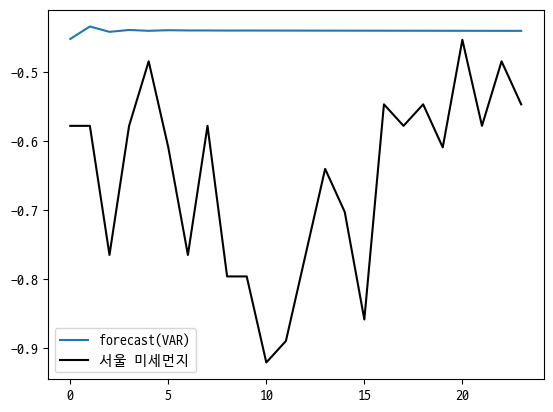

In [15]:
lag_order = results.k_ar
fore = results.forecast(data_train.values[-results.k_ar:], 24)
fore = fore[:,-2]

#diff 되돌리기
for i in range(len(fore)):
    past = PM10['서울pm10'].iloc[-25] if i==0 else fore[i-1]
    fore[i] += past

RESULT_pm10 = pd.concat([pd.DataFrame(fore),PM10['서울pm10'][-24:].reset_index(drop=True)],axis=1)
RESULT_pm10.columns = ['forecast(VAR)','Real value']
plt.plot(RESULT_pm10['forecast(VAR)'],color='C0',label='forecast(VAR)')
plt.plot(RESULT_pm10['Real value'],color='Black',label='서울 미세먼지')
plt.legend()

## Basic Transformer

In [16]:
params = {
    'window_size':30,
    'forecast_range':24,
    'num_layers':6,
    'dff':512,
    'd_model':128,
    'num_heads':8,
    'dropout':0.1
}

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-11-28 12:40:57.236593: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10706 MB memory:  -> device: 0, name: NVIDIA TITAN Xp, pci bus id: 0000:65:00.0, compute capability: 6.1


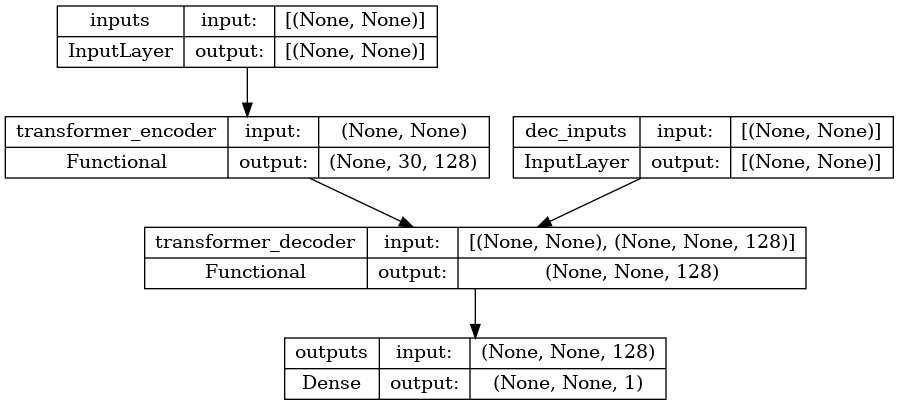

In [17]:
tf.keras.backend.clear_session()
model_pm10 = basic_time_series_transformer(
    window_size=params['window_size'],
    forecast_range=params['forecast_range'],
    num_layers=params['num_layers'],
    dff=params['dff'],
    d_model=params['d_model'], 
    num_heads=params['num_heads'],
    dropout=params['dropout'],
    name="time_series_transformer")

tf.keras.utils.plot_model(model_pm10, to_file='./imgs/basic_transformer.png', show_shapes=True,show_layer_names=True)

In [18]:
PM10_BT = PM10['서울pm10'].to_numpy()
PM10_BT.shape

(52608,)

In [19]:
split_by_window = []
label_forecast = []
for i in range(PM10_BT.shape[0]-params['window_size']-params['forecast_range']+1):
    split_by_window.append(PM10_BT[i:i+params['window_size']])
    label_forecast.append(PM10_BT[i+params['window_size']-1:i+params['window_size']+params['forecast_range']])
split_by_window = np.array(split_by_window)
label_forecast = np.array(label_forecast)
print(split_by_window.shape,label_forecast.shape)

(52555, 30) (52555, 25)


In [20]:
# 텐서플로우 dataset을 이용하여 셔플(shuffle)을 수행하되, 배치 크기로 데이터를 묶는다.
# 또한 이 과정에서 교사 강요(teacher forcing)을 사용하기 위해서 디코더의 입력과 실제값 시퀀스를 구성한다.

split_point=round(label_forecast.shape[0]*0.8)
print(split_point)

BATCH_SIZE = 512
BUFFER_SIZE = 20000

train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': split_by_window[:split_point],
        'dec_inputs': label_forecast[:split_point,:-1] #teaching force
    },
    {
        'outputs': label_forecast[:split_point, 1:,np.newaxis]
    },
))

train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

42044


In [21]:
test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': split_by_window[split_point:],
        'dec_inputs': label_forecast[split_point:,:-1] #teaching force
    },
    {
        'outputs': label_forecast[split_point:, 1:,np.newaxis]  
    },
))

test_dataset = test_dataset.cache()
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [24]:
model_pm10.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.MeanSquaredError()
)

callback_path = './result/basic_transformer/PM10'

os.makedirs(f'{callback_path}/ckpt', exist_ok=True)
ckpt_path = callback_path+'/ckpt/model_ckpt'
callback_ckpt = tf.keras.callbacks.ModelCheckpoint(
    ckpt_path,
    monitor='val_loss',
    save_best_only = True,
    save_weights_only=True,
    verbose=1
)

os.makedirs(f'{callback_path}/tsbd', exist_ok=True)
callback_tsbd = tf.keras.callbacks.TensorBoard(f'{callback_path}/tsbd')

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.95 # 5epoch 이후 0.95씩 줄어듦(ex. 0.001, 0.001*0.95, 0.001*0.95^2, 0.001*0.95^3, ...)
callback_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.00095, 0.0009025, 0.000857375, 0.0008145062499999999, 0.0007737809374999998, 0.0007350918906249997, 0.0006983372960937497, 0.0006634204312890621, 0.000630249409724609, 0.0005987369392383785, 0.0005688000922764595, 0.0005403600876626365, 0.0005133420832795047, 0.00048767497911552944, 0.00046329123015975297, 0.0004401266686517653, 0.00041812033521917703, 0.00039721431845821814, 0.0003773536025353072, 0.0003584859224085418, 0.0003405616262881147, 0.00032353354497370894, 0.00030735686772502346, 0.00029198902433877225, 0.00027738957312183364, 0.0002635200944657419, 0.0002503440897424548, 0.00023782688525533205, 0.00022593554099256544, 0.00021463876394293716]


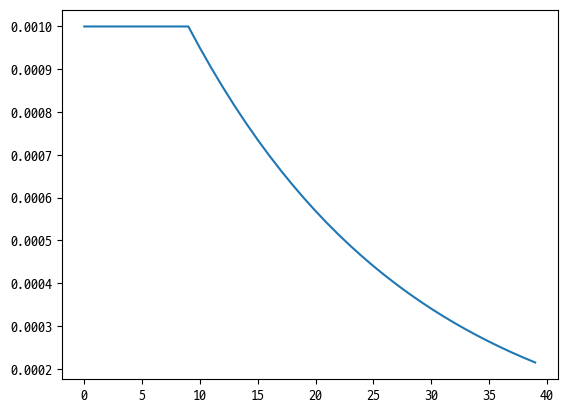

In [25]:
lr = 0.001
e = np.arange(40)

r = [lr for _ in range(len(e))]
for i in range(40):
    lr_ = lr if i == 0 else r[i-1]
    lr_ = scheduler(i, lr_)
    r[i] = lr_

print(r)
plt.plot(e,r)


In [26]:
history = model_pm10.fit(train_dataset, epochs=20, validation_data=test_dataset, verbose = 1, callbacks=[callback_ckpt,callback_scheduler,callback_tsbd])

Epoch 1/20
83/83 [==============================] - ETA: 0s - loss: 1.3425
Epoch 1: val_loss improved from inf to 2.23010, saving model to ./result/basic_transformer/PM10/ckpt/model_ckpt
83/83 [==============================] - 32s 240ms/step - loss: 1.3425 - val_loss: 2.2301 - lr: 0.0010
Epoch 2/20
83/83 [==============================] - ETA: 0s - loss: 0.3113
Epoch 2: val_loss improved from 2.23010 to 1.00114, saving model to ./result/basic_transformer/PM10/ckpt/model_ckpt
83/83 [==============================] - 18s 220ms/step - loss: 0.3113 - val_loss: 1.0011 - lr: 0.0010
Epoch 3/20
83/83 [==============================] - ETA: 0s - loss: 0.1261
Epoch 3: val_loss improved from 1.00114 to 0.57147, saving model to ./result/basic_transformer/PM10/ckpt/model_ckpt
83/83 [==============================] - 18s 222ms/step - loss: 0.1261 - val_loss: 0.5715 - lr: 0.0010
Epoch 4/20
83/83 [==============================] - ETA: 0s - loss: 0.1107
Epoch 4: val_loss improved from 0.57147 to 0.45

In [27]:
model_pm10.load_weights('./result/basic_transformer/PM10/ckpt/model_ckpt')

In [28]:
data_test = PM10['서울pm10'].to_numpy()[np.newaxis,-(params['window_size']+params['forecast_range']):-params['forecast_range']]
data_test_dec_input = data_test[0,-1].reshape((1,1))
data_test, data_test_dec_input

(array([[ 1.57111597,  1.50882139,  1.35308492,  1.29079033,  0.48096068,
          0.23178233, -0.20427978, -0.23542708, -0.1419852 ,  0.32522421,
          0.07604586,  0.01375127, -0.23542708, -0.20427978, -0.17313249,
          0.04489857, -0.51575272, -0.73378378, -0.32886896, -0.6403419 ,
         -0.57804731, -0.82722566, -0.6403419 , -0.54690002, -0.36001625,
         -0.60919461, -0.54690002, -0.29772167, -0.48460543, -0.42231084]]),
 array([[-0.42231084]]))

In [29]:
out = model_pm10.predict([data_test,data_test_dec_input])
np.concatenate([data_test_dec_input,out.reshape((1,-1))],axis=1)

1/1 [==============================] - 1s 1s/step


array([[-0.42231084, -0.39820281]])

In [30]:
out = model_pm10.predict([data_test,data_test_dec_input])
out_ = np.concatenate([data_test_dec_input,out.reshape((1,-1))],axis=1)

for i in range(23):
    out = model_pm10.predict([data_test,out_])
    out_ = np.concatenate([data_test_dec_input,out.reshape((1,-1))],axis=1)

print(out)
print(out.shape)

1/1 [==============================] - 0s 34ms/step
[[[-0.39820287]
  [-0.38147065]
  [-0.366257  ]
  [-0.3513204 ]
  [-0.3352275 ]
  [-0.32009083]
  [-0.30876398]
  [-0.2919951 ]
  [-0.27797946]
  [-0.2651097 ]
  [-0.2514887 ]
  [-0.2417121 ]
  [-0.2290455 ]
  [-0.21621384]
  [-0.2027679 ]
  [-0.18310477]
  [-0.16807877]
  [-0.15368477]
  [-0.13598825]
  [-0.11757416]
  [-0.09391831]
  [-0.07260323]
  [-0.05688646]
  [-0.03880564]]]
(1, 24, 1)


In [31]:
RESULT_pm10_2 = pd.concat([pd.DataFrame(out[0,:,:]),RESULT_pm10],axis=1)
RESULT_pm10_2.columns = ['forecast(Basic Transformer)','forecast(VAR)','Real value']

RESULT_pm10_2 = RESULT_pm10_2*np.sqrt(scaler_pm10.var_[-2])+scaler_pm10.mean_[-2] #scale 되돌림

RESULT_pm10_2.to_csv('./비교모델 결과(미세먼지).csv',index=False)

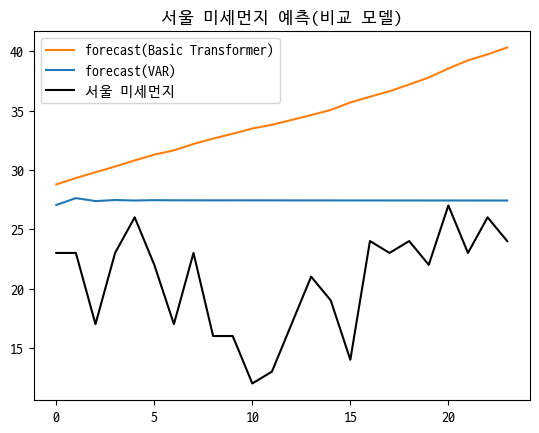

In [32]:
plt.plot(RESULT_pm10_2['forecast(Basic Transformer)'],color='C1',label='forecast(Basic Transformer)')
plt.plot(RESULT_pm10_2['forecast(VAR)'],color='C0',label='forecast(VAR)')
plt.plot(RESULT_pm10_2['Real value'],color='Black',label='서울 미세먼지')
plt.title('서울 미세먼지 예측(비교 모델)')
plt.legend()

# KOSPI 데이터

In [ ]:
KOSPI = pd.read_csv('./data/kospi_financeIndex_and_stock.csv')
KOSPI.Date = pd.DatetimeIndex(KOSPI.Date)

KOSPI.index = KOSPI.Date
KOSPI = KOSPI.drop(columns = ['Date'])

KOSPI_col = KOSPI.columns.copy()
KOSPI_index = KOSPI.index.copy()

scaler_kospi = StandardScaler()
scaler_kospi.fit(KOSPI)
KOSPI = scaler_kospi.transform(KOSPI)

KOSPI = pd.DataFrame(KOSPI,columns = KOSPI_col,index=KOSPI_index)

KOSPI

In [ ]:
close_stock = KOSPI.iloc[:,8:].copy()
close_stock = pd.concat([KOSPI['KOSPI'],close_stock],axis=1)
corr_name = close_stock.corr().sort_values(by='KOSPI',ascending=False).index.to_list()

select_range = 20
select_by_corr = []
select_by_corr.extend(corr_name[1:select_range+1])
select_by_corr.extend(corr_name[-select_range:])

close_stock.corr().sort_values(by='KOSPI',ascending=False)['KOSPI'][select_by_corr]

## Vector autoregression

In [ ]:
select_col = select_by_corr
select_col.extend(KOSPI.columns[:8].to_list())
KOSPI_var = KOSPI[select_col].copy()
KOSPI_var

In [ ]:
plt.figure(figsize=(50,50))

sns.heatmap(KOSPI_var.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
select_col =  KOSPI_var.corr()[abs(KOSPI_var.corr()['KOSPI']) > 0.7].KOSPI.index.to_list()
print(KOSPI_var.corr()[abs(KOSPI_var.corr()['KOSPI']) > 0.7].KOSPI)
print(len(select_col))

KOSPI_var_1 = KOSPI_var[select_col].copy()
KOSPI_var_1.reset_index(drop=True,inplace=True)
KOSPI_var_1

In [ ]:
max_diff = 3

fig = plt.figure(figsize=(25*3,3*max_diff))
ax_list = [fig.add_subplot(max_diff,25,i+1) for i in range(25*max_diff)]

for i in range(max_diff):
    for j,V in enumerate(select_col):
        if i == 0:
            sm.graphics.tsa.plot_acf(KOSPI_var_1[V],lags=10,zero=False, ax=ax_list[25*i+j])
        elif i == 1:
            sm.graphics.tsa.plot_acf(KOSPI_var_1[V].diff().dropna(),lags=10,zero=False, ax=ax_list[25*i+j])
        else:
            sm.graphics.tsa.plot_acf(KOSPI_var_1[V].diff().diff().dropna(),lags=10,zero=False, ax=ax_list[25*i+j])
        ax_list[4*i+j].set_title(f'{V}, diff_dim={i}')

In [ ]:
data_train = KOSPI_var_1[:-20].diff(periods=1).dropna()
data_test = KOSPI_var_1[-21:].diff(periods=1).dropna()
print(data_train.tail())
print('-'*20)
print(data_test.head())

In [ ]:
model = VAR(data_train)

#model.select_order(30)
#results = model.fit(maxlags=30, ic='aic')

results = model.fit(3)
results.summary()

In [ ]:
#fig = results.plot_acorr()

In [ ]:
lag_order = results.k_ar
fore = results.forecast(data_train.values[-results.k_ar:], 20)
pd.DataFrame(fore,columns = data_test.columns)['KOSPI'].to_numpy()


In [ ]:
lag_order

In [ ]:
fore_range = 1

lag_order = results.k_ar
fore = results.forecast(data_train.values[-results.k_ar-fore_range:-fore_range], 20)
fore = pd.DataFrame(fore,columns = data_test.columns)['KOSPI'].to_numpy()

#diff 되돌리기
for i in range(len(fore)):
    past = KOSPI['KOSPI'].iloc[-20-lag_order-fore_range-1] if i==0 else fore[i-1]
    fore[i] += past

RESULT_kospi = pd.concat([pd.DataFrame(fore),KOSPI['KOSPI'][-20-fore_range:-fore_range].reset_index(drop=True)],axis=1)
RESULT_kospi.columns = ['forecast(VAR)','Real value']
plt.plot(RESULT_kospi['forecast(VAR)'],color='C0',label='forecast(VAR)')
plt.plot(RESULT_kospi['Real value'],color='Black',label='KOSPI')
plt.legend()

## Basic Transformer

In [ ]:
params = {
    'window_size':30,
    'forecast_range':20,
    'num_layers':4,
    'dff':512,
    'd_model':128,
    'num_heads':4,
    'dropout':0.1
}

In [ ]:
print(f'is na? {KOSPI.isna().sum().sum()}')
print('-'*80)

KOSPI_BT = KOSPI['KOSPI'].to_numpy()

print(f'length of KOSPI data : {KOSPI_BT.shape}')

split_by_window = []
label_forecast = []
for i in range(KOSPI_BT.shape[0]-params['window_size']-params['forecast_range']+1):
    split_by_window.append(KOSPI_BT[i:i+params['window_size']])
    label_forecast.append(KOSPI_BT[i+params['window_size']-1:i+params['window_size']+params['forecast_range']])
split_by_window = np.array(split_by_window)
label_forecast = np.array(label_forecast)
print(f'total process data shape(data, label) : {split_by_window.shape},{label_forecast.shape}')

In [ ]:
# Train+Valid / Test 나누기
# Test는 끝자락 시간만, Train+valid는 섞어서
split_test_num = 3
split_point = label_forecast.shape[0]-split_test_num
shuffle_idx = np.random.choice(split_point,split_point,replace=False)

print(f'shuffling : [{shuffle_idx[0]}, {shuffle_idx[1]}, {shuffle_idx[2]} ~ {shuffle_idx[-3]}, {shuffle_idx[-2]}, {shuffle_idx[-1]}]')

test_traget = split_by_window[-split_test_num:]
test_label = label_forecast[-split_test_num:]
print(f'{test_traget.shape}{test_label.shape}')

split_by_window = split_by_window[shuffle_idx]
label_forecast = label_forecast[shuffle_idx]
print(f'{split_by_window.shape}{label_forecast.shape}')

In [ ]:
split_point=round(label_forecast.shape[0]*0.8)
print(split_point)

BATCH_SIZE = 512
BUFFER_SIZE = 20000

train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': split_by_window[:split_point],
        'dec_inputs': label_forecast[:split_point,:-1] #teaching force
    },
    {
        'outputs': label_forecast[:split_point, 1:,np.newaxis]
    },
))

train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': split_by_window[split_point:],
        'dec_inputs': label_forecast[split_point:,:-1] #teaching force
    },
    {
        'outputs': label_forecast[split_point:, 1:,np.newaxis]  
    },
))

test_dataset = test_dataset.cache()
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
del model_pm10

In [ ]:
tf.keras.backend.clear_session()

model_kospi = basic_time_series_transformer(
    window_size=params['window_size'],
    forecast_range=params['forecast_range'],
    num_layers=params['num_layers'],
    dff=params['dff'],
    d_model=params['d_model'], 
    num_heads=params['num_heads'],
    dropout=params['dropout'],
    name="time_series_transformer")

tf.keras.utils.plot_model(model_kospi, to_file='./imgs/basic_transformer.png', show_shapes=True,show_layer_names=True)

In [ ]:
model_kospi.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.MeanSquaredError()
)

callback_path = './result/basic_transformer/KOSPI'

os.makedirs(f'{callback_path}/ckpt', exist_ok=True)
ckpt_path = callback_path+'/ckpt/model_ckpt'
callback_ckpt = tf.keras.callbacks.ModelCheckpoint(
    ckpt_path,
    monitor='val_loss',
    save_best_only = True,
    save_weights_only=True,
    verbose=1
)

os.makedirs(f'{callback_path}/tsbd', exist_ok=True)
callback_tsbd = tf.keras.callbacks.TensorBoard(f'{callback_path}/tsbd')

def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.75 
callback_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
history = model_kospi.fit(train_dataset, epochs=60, validation_data=test_dataset, verbose = 1, callbacks=[callback_ckpt,callback_scheduler,callback_tsbd])

In [ ]:
model_kospi.load_weights('./result/basic_transformer/KOSPI/ckpt/model_ckpt')

In [ ]:
fore_range = 1

data_test = KOSPI['KOSPI'].to_numpy()[np.newaxis,-(params['window_size']+params['forecast_range']+fore_range):-(params['forecast_range']+fore_range)]
data_test_dec_input = data_test[0,-1].reshape((1,1))
data_test, data_test_dec_input

In [ ]:
out = model_kospi.predict([data_test,data_test_dec_input])
out_ = np.concatenate([data_test_dec_input,out.reshape((1,-1))],axis=1)

for i in range(19):
    out = model_kospi.predict([data_test,out_])
    out_ = np.concatenate([data_test_dec_input,out.reshape((1,-1))],axis=1)

print(out)
print(out.shape)

In [ ]:
RESULT_kospi_2 = pd.concat([pd.DataFrame(out[0,:,:]),RESULT_kospi],axis=1)
RESULT_kospi_2.columns = ['forecast(Basic Transformer)','forecast(VAR)','Real value']

RESULT_kospi_2 = RESULT_kospi_2*np.sqrt(scaler_kospi.var_[0])+scaler_kospi.mean_[0] #scale 되돌림

RESULT_kospi_2.to_csv('./비교모델 결과(KOSPI).csv',index=False)

In [ ]:
plt.plot(RESULT_kospi_2['forecast(Basic Transformer)'],color='C1',label='forecast(Basic Transformer)')
plt.plot(RESULT_kospi_2['forecast(VAR)'],color='C0',label='forecast(VAR)')
plt.plot(RESULT_kospi_2['Real value'],color='Black',label='KOSPI')
plt.title('KOSPI 예측(비교 모델)')
plt.legend()

In [ ]:
from matplotlib import ticker
K = KOSPI['KOSPI'].iloc[-50:-1].reset_index(drop=True).copy()
K = K*np.sqrt(scaler_kospi.var_[0])+scaler_kospi.mean_[0]

fig, ax = plt.subplots(1,1)
ax.plot(K,color='black',label='KOSPI')
ax.plot([i for i in range(30,50)],RESULT_kospi_2['forecast(VAR)'],color='C0',label='forecast(VAR)')
ax.plot([i for i in range(30,50)],RESULT_kospi_2['forecast(Basic Transformer)'],color='C1',label='forecast(Basic Transformer)')
ax.vlines(30,2830,3050,linestyles='dashed',color='C3',alpha=0.5)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.legend()

https://wikidocs.net/31379